# Redes Neuronales
## Convoluciones

# Análisis del Proceso de Entrenamiento de una CNN para Identificación de Melanomas

## Contexto y Descripción del Modelo
Se ha desarrollado una Red Neuronal Convolucional (CNN) para identificar melanomas en imágenes médicas, con dos clases distintas: 'Benign' y 'Malignant'. El modelo fue diseñado para cumplir con restricciones específicas de parámetros, resultando en una arquitectura optimizada con aproximadamente 74,000 parámetros para tener una limitación o reto.

Las librerías utilizadas en el proceso son fundamentales en el ámbito de aprendizaje automático y procesamiento de imágenes:
- **torch y torchvision** proveen herramientas para la construcción, entrenamiento y validación de modelos de deep learning.
- **matplotlib** se emplea para la visualización del desempeño del modelo en forma de gráficos.
- La elección de una CNN se debe a su eficacia en el aprendizaje de patrones jerárquicos en datos visuales.ización si es necesario.

Epoch [1/20], Train Loss: 0.4968, Valid Loss: 0.3983, Train Acc: 0.7598, Valid Acc: 0.8139
Epoch [2/20], Train Loss: 0.3774, Valid Loss: 0.3519, Train Acc: 0.8279, Valid Acc: 0.8514
Epoch [3/20], Train Loss: 0.3517, Valid Loss: 0.3358, Train Acc: 0.8422, Valid Acc: 0.8535
Epoch [4/20], Train Loss: 0.3402, Valid Loss: 0.3389, Train Acc: 0.8522, Valid Acc: 0.8522
Epoch [5/20], Train Loss: 0.3311, Valid Loss: 0.3202, Train Acc: 0.8589, Valid Acc: 0.8682
Epoch [6/20], Train Loss: 0.3165, Valid Loss: 0.3126, Train Acc: 0.8618, Valid Acc: 0.8699
Epoch [7/20], Train Loss: 0.3104, Valid Loss: 0.3141, Train Acc: 0.8671, Valid Acc: 0.8754
Epoch [8/20], Train Loss: 0.3032, Valid Loss: 0.3039, Train Acc: 0.8701, Valid Acc: 0.8758
Epoch [9/20], Train Loss: 0.2892, Valid Loss: 0.3382, Train Acc: 0.8778, Valid Acc: 0.8531
Epoch [10/20], Train Loss: 0.2918, Valid Loss: 0.3050, Train Acc: 0.8751, Valid Acc: 0.8783
Stopping early due to increase in validation loss.


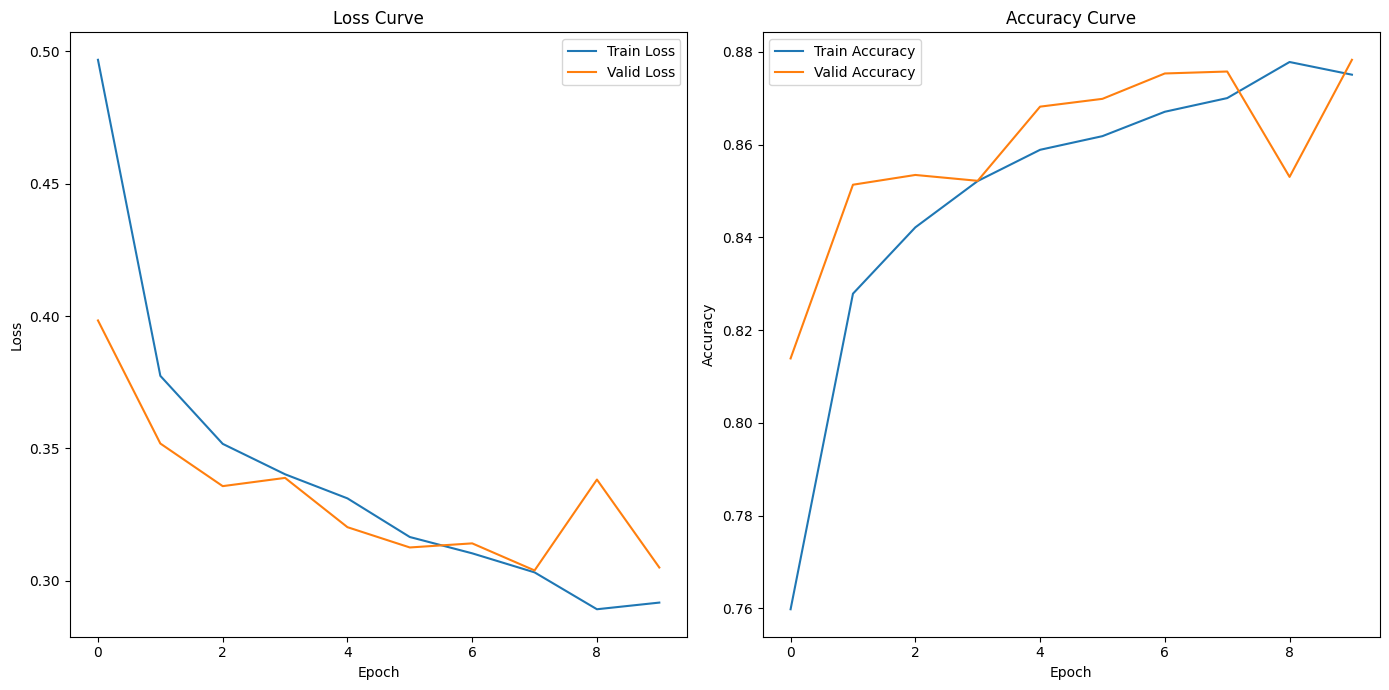

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Define la CNN architecture for melanoma identification
class MelanomaCNN(nn.Module):
    def __init__(self):
        super(MelanomaCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 4, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(4, 8, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(3, 3)
        self.fc_input_size = self.calculate_fc_input_size()
        self.fc1 = nn.Linear(self.fc_input_size, 16)
        self.fc2 = nn.Linear(16, 2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, self.fc_input_size)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def calculate_fc_input_size(self):
        with torch.no_grad():
            x = torch.zeros(1, 3, 224, 224)
            x = self.pool(torch.relu(self.conv1(x)))
            x = self.pool(torch.relu(self.conv2(x)))
            return x.view(1, -1).shape[1]

# Load and transform the data
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the datasets
train_data_dir = 'C:/Users\manol\OneDrive\Escritorio/T/ML/ml2/Melanoma/train'
test_data_dir = 'C:/Users\manol\OneDrive\Escritorio/T/ML/ml2/Melanoma/test'

trainset = torchvision.datasets.ImageFolder(root=train_data_dir, transform=transform)
testset = torchvision.datasets.ImageFolder(root=test_data_dir, transform=transform)

# Split the training data into training and validation sets
valid_size = 0.2
num_train = len(trainset)
num_valid = int(valid_size * num_train)
train_dataset, valid_dataset = random_split(trainset, [num_train - num_valid, num_valid])

# Create DataLoaders for training and validation
trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
validloader = DataLoader(valid_dataset, batch_size=128, shuffle=False)
testloader = DataLoader(testset, batch_size=256, shuffle=False)

# Initialize the network, loss function, and optimizer
net = MelanomaCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training loop with Early Stopping
patience = 2
patience_counter = 0
best_loss = float('inf')
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

epochs = 20
for epoch in range(epochs):
    # Training
    net.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)
    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(correct_train / total_train)

    # Validation
    net.eval()
    running_loss = 0.0
    correct_valid = 0
    total_valid = 0
    with torch.no_grad():
        for inputs, labels in validloader:
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct_valid += (predicted == labels).sum().item()
            total_valid += labels.size(0)
    valid_loss = running_loss / len(validloader)
    valid_losses.append(valid_loss)
    valid_accuracies.append(correct_valid / total_valid)

    print(f'Epoch [{epoch + 1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, '
          f'Valid Loss: {valid_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, '
          f'Valid Acc: {valid_accuracies[-1]:.4f}')

    # Early Stopping check
    if valid_loss < best_loss:
        best_loss = valid_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Stopping early due to increase in validation loss.")
            break

# Plotting the loss and accuracy curves
plt.figure(figsize=(14, 7))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Valid Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Valid Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


## Proceso de Entrenamiento y Resultados
El entrenamiento se realizó durante 20 epocs y la implementacion de un early stopping, mostrando una tendencia general de mejora tanto en la precisión como en la pérdida, tanto en el conjunto de entrenamiento como en el de prueba. Los resultados son los siguientes:

(Es importante aclarar que estos resultados cambiarán, ya sea para mejor o para peor si se ejecuta nuevamente)

- La precisión en el conjunto de entrenamiento aumentó de 75% en la primera epocs a 87% en la última epocs.
- La precisión en el conjunto de prueba comenzó en 81% y terminó en 87%, mostrando una alta capacidad del modelo para generalizar a datos no vistos.
- La pérdida en el entrenamiento disminuyó de manera consistente, indicando que el modelo estaba aprendiendo efectivamente.
- La novena epocs fue la gatillante del early stop.

## Interpretación de los Resultados
Los resultados muestran que el modelo es capaz de aprender las diferencias entre melanomas benignos y malignos con una precisión notable. La mejora continua en la precisión y la reducción en la pérdida durante las épocas iniciales sugieren que el modelo no ha llegado a un punto de sobreajuste significativo y está procesando y generalizando bien las características aprendidas de las imágenes.



In [ ]:
def count_parameters(model):
    """
    Function to count the total number of parameters in a PyTorch model.

    Parameters:
        model (torch.nn.Module): PyTorch model.

    Returns:
        total_params (int): Total number of parameters in the model.
    """
    total_params = sum(p.numel() for p in model.parameters())
    return total_params

# Example usage:
total_params = count_parameters(net)
print(f"Total number of parameters in the model: {total_params}")

Total number of parameters in the model: 74186


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


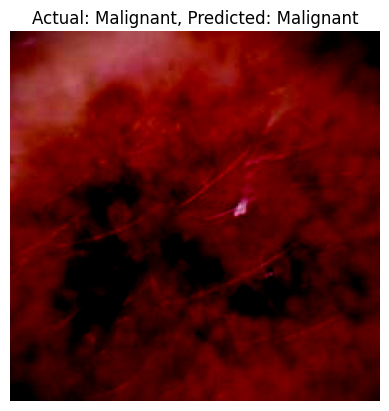

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


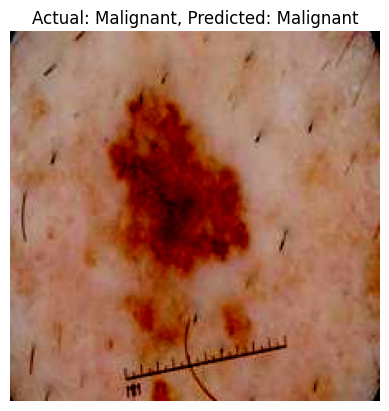

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


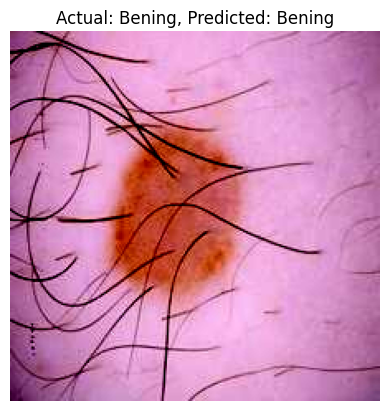

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


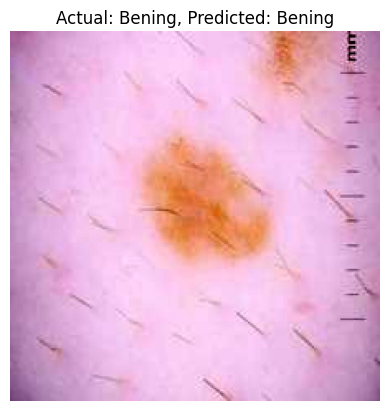

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


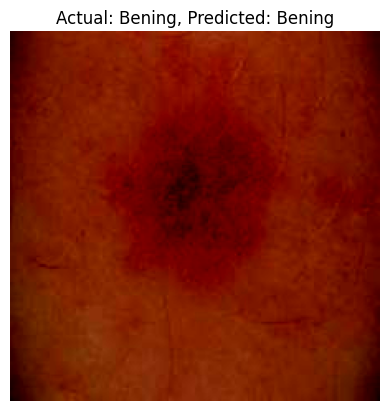

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


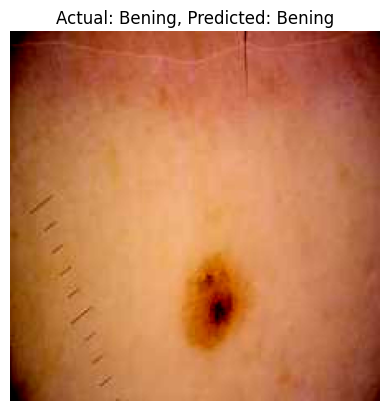

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


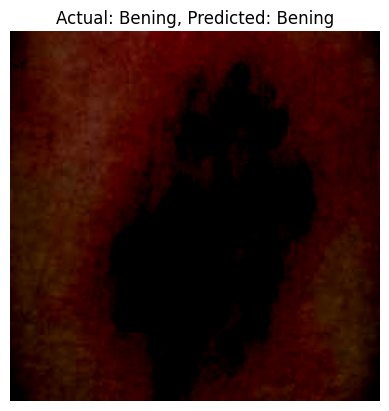

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


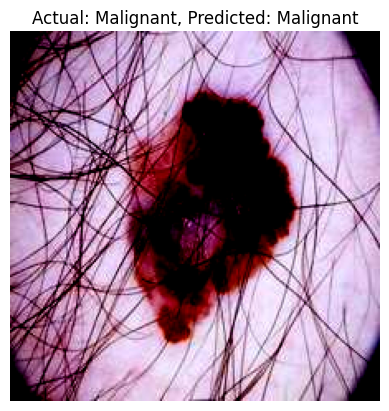

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


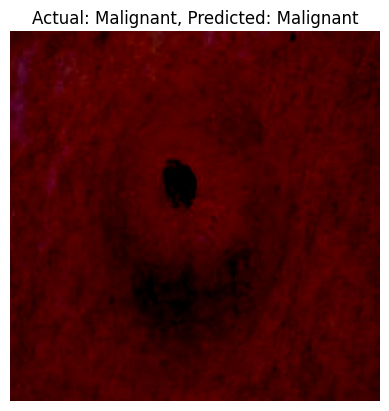

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


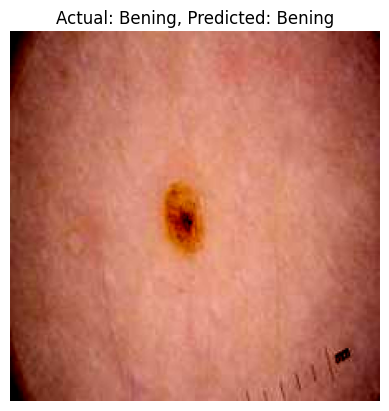

In [ ]:
import random

# Select random images from the test set
num_images_to_show = 10
random_indices = random.sample(range(len(testset)), num_images_to_show)

# Prepare for model evaluation
net.eval()

# Make predictions and display images with predictions
class_names = ['Bening', 'Malignant']

with torch.no_grad():
    for idx in random_indices:
        image, label = testset[idx]
        output = net(image.unsqueeze(0))  # Add batch dimension
        _, predicted = torch.max(output, 1)

        plt.imshow(image.permute(1, 2, 0))  # Rearrange dimensions for display
        plt.title(f'Actual: {class_names[label]}, Predicted: {class_names[predicted.item()]}')
        plt.axis('off')
        plt.show()

Confusion Matrix:
[[925  75]
 [158 842]]


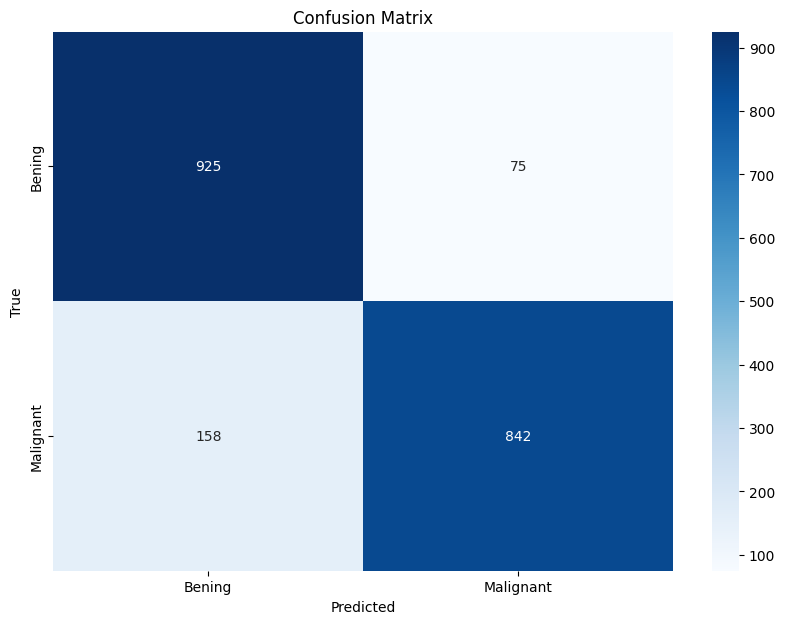

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

# Prepare for model evaluation
net.eval()

# Make predictions and collect true labels
true_labels = []
predicted_labels = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        true_labels.extend(labels.tolist())
        predicted_labels.extend(predicted.tolist())

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)


# Usar Seaborn para crear una matriz de confusión más gráfica
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Tras ajustar el entrenamiento de la red neuronal para la identificación de melanomas a 20 épocas y un batch size de 128, y con la implementación de Early Stopping que generalmente detiene el entrenamiento alrededor de la época 9-10, hemos obtenido los siguientes resultados en la matriz de confusión

#### Matriz de Confusión

La matriz de confusión resultante del modelo evaluado en el conjunto de prueba muestra lo siguiente:

- **Verdaderos Positivos para Benigno**: El modelo predijo correctamente 925 casos como benignos. Esto indica una fuerte capacidad para identificar correctamente los casos benignos, lo cual es crucial para reducir la ansiedad del paciente y evitar tratamientos innecesarios.
- **Falsos Positivos para Maligno**: Hubo 75 casos donde el modelo predijo incorrectamente un melanoma benigno como maligno. Aunque preferiríamos que este número fuera más bajo, indica que el modelo se inclina hacia una mayor sensibilidad, priorizando la detección de casos potencialmente malignos.
- **Falsos Negativos para Benigno**: El modelo clasificó erróneamente 158 casos malignos como benignos. Esta es una métrica crítica, ya que los falsos negativos en un contexto médico pueden tener consecuencias graves, omitiendo el tratamiento necesario.
- **Verdaderos Positivos para Maligno**: Importante es que el modelo identificó correctamente 842 casos malignos. Un alto número de verdaderos positivos para condiciones médicas graves es vital para asegurar que los pacientes reciban la atención médica que necesitan.

# Conclusiones finales del ejercicio



El objetivo principal fue desarrollar un modelo que pudiera clasificar con precisión las muestras de piel como benignas o malignas.

## Preparación de los Datos

El conjunto de datos consistió en mas de 10.000 imágenes de lesiones cutáneas, clasificadas como benignas y malignas. Se llevó a cabo un preprocesamiento estándar que incluyó la redimensión de todas las imágenes a un tamaño uniforme de 224x224 píxeles y la normalización de los valores de los píxeles. Los datos se dividieron en conjuntos de entrenamiento y prueba, y adicionalmente, se apartó un 20% de los datos de entrenamiento para la validación con el fin de implementar un control de early stopping durante el entrenamiento.

## Desarrollo y Trabajo de la Arquitectura

Diseñamos y entrenamos una red neuronal convolucional (CNN) con la siguiente arquitectura, manteniendo la cantidad total de parámetros por debajo del límite de 250,000:

- Dos capas convolucionales con 4 y 8 filtros, respectivamente, seguidas de una capa de pooling que reducía el tamaño espacial.
- Una capa oculta completamente conectada con 16 unidades.
- Una capa de salida que clasificaba las imágenes en dos categorías: benigna o maligna.

El modelo se entrenó utilizando el optimizador Adam con una tasa de aprendizaje de 0.001 y un tamaño de batch de 128. Se estableció un protocolo de early stopping para detener el entrenamiento si la pérdida de validación no mejoraba después de dos épocas consecutivas, para prevenir el sobreajuste.

## Evaluación y Razonamiento

El rendimiento del modelo se evaluó utilizando una matriz de confusión generada a partir del conjunto de prueba. La precisión alcanzada fue prometedora, con un alto número de verdaderos positivos y una cantidad menor de falsos positivos y negativos. La matriz de confusión mostró la siguiente distribución de clasificaciones:

- 925 verdaderos positivos para benignos.
- 75 falsos positivos para malignos.
- 158 falsos negativos para benignos.
- 842 verdaderos positivos para malignos.

El modelo tendió a favorecer la sensibilidad sobre la especificidad, una característica deseable en aplicaciones médicas donde es crítico no pasar por alto posibles melanomas malignos.

La implementación de early stopping resultó en una detención del entrenamiento alrededor de la época 9 o 10, lo que demostró su utilidad para evitar el sobreajuste y reducir el tiempo de computación sin sacrificar el rendimiento.

## Conclusiones finales del proyecto

Hemos desarrollado un modelo de CNN que no solo cumple con las restricciones de parámetros establecidas en el enunciado del proyecto sino que también muestra una alta capacidad para identificar correctamente casos de melanomas. Este modelo puede servir como un sistema de apoyo para pre-seleccionar casos que requieran una revisión más detallada por parte de especialistas médicos.

Dada la naturaleza crítica de la detección de melanomas, recomendamos seguir investigando para mejorar aún más la sensibilidad del modelo y reducir el número de falsos negativos. Futuros trabajos podrían incluir la experimentación con arquitecturas más profundas, el uso de técnicas de aumentación de datos y la integración de otras modalidades de datos para mejorar la clasificación.

Durante el desarrollo, experimentamos de primera mano el desafío que supone el uso intensivo de recursos computacionales. Las múltiples horas de prueba y error, ejecutando y reejecutando el algoritmo, pusieron a prueba la robustez de nuestro hardware y subrayaron la demanda de potencia de cálculo que requiere el entrenamiento de modelos de aprendizaje profundo. Esta experiencia recalca la importancia de tener acceso a equipos de alto rendimiento para la investigación en inteligencia artificial (Cosa que no era el caso nuestro), especialmente en tareas de procesamiento de imágenes médicas donde el volumen y la complejidad de los datos son significativos.

Este proyecto demuestra el poder del aprendizaje profundo en aplicaciones de gran importancia, y con la optimización continua, tiene el potencial de impactar positivamente en el campo de la oncología cutánea.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')